In [1]:
%pylab inline
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy, csv
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


## North Carolina TRI Data, 1997-2001

In this notebook, we'll be looking at TRI reported releases in North Carolina for the years 1997 through 2001. The three main goals of this notebook are:

    - Explore top releasing facilities in terms of total releases and carcinogenic releases
    - Explore top releasing industry sectors in terms of total releases and carcinogenic releases
    - Visualize on-site releases in NC over this time period using Basemap

#### Top Releasing Facilities
Identifying the facilities in NC that have the highest total, and carcinogenic, releases during this time period will give us an idea of the locations in the state which may be most heavily affected by toxic release.

#### Top Releasing Industry Sectors
Looking at the top releasing industry sectors for NC will be interesting in and of itself, and will let us see if releases in particular sectors are high because of the sector itself or because of the relative density of the industry type in the state of NC. This will be relevant to compare to other states later on.

#### Basemap Visualization
Using Basemap to visualise features of these data in NC will be a good way to think about which features are amenable and relevant to geographical mapping, as opposed to numerical trends that are more naturally represented with charts.

### Importing the TRI Data

In [2]:
# reading in each set of csv data
nc_97 = pd.read_csv('./data/TRI_1997_NC.csv')
nc_98 = pd.read_csv('./data/TRI_1998_NC.csv')
nc_99 = pd.read_csv('./data/TRI_1999_NC.csv')
nc_00 = pd.read_csv('./data/TRI_2000_NC.csv')
nc_01 = pd.read_csv('./data/TRI_2001_NC.csv')

# storing the data in a common array to aggregate for comprehensions, etc
nc_data = [nc_97,nc_98,nc_99,nc_00,nc_01]

# Top Releasing Facilities

## Top Releasing Facilities - Total

In [7]:
#code, charts and graphs related to top releasing facilities

#separating out attributes of interest
totalreleases = [yr[['YEAR','FACILITY_NAME','CHEMICAL','TOTAL_RELEASES']] for yr in nc_data]
topten_byyear = [totalreleases[i].sort_values('TOTAL_RELEASES', ascending=False)[0:10] for i in range(len(totalreleases))]

### Total Toxic Releases 1997 - Top Ten

,YEAR,FACILITY_NAME,CHEMICAL,TOTAL_RELEASES
2512,1997,ELEMENTIS CHROMIUM INC,CHROMIUM COMPOUNDS(EXCEPT CHROMITE ORE MINED I...,9120298.0
1197,1997,PCS PHOSPHATE CO INC,PHOSPHORIC ACID,8391999.0
1538,1997,PCS PHOSPHATE CO INC,AMMONIA,3692213.0
807,1997,SMITHFIELD-TAR HEEL,NITRATE COMPOUNDS,3682714.0
608,1997,GERDAU LONG STEEL NA-CHARLOTTE MILL,ZINC COMPOUNDS,3292326.0
942,1997,BLUE RIDGE PAPER PRODUCTS INC (DBA EVERGREEN P...,METHANOL,1932700.0
281,1997,SHURTAPE TECHNOLOGIES LLC - HICKORY TAPE PLANT,TOLUENE,1864554.0
1065,1997,INTERNATIONAL PAPER RIEGELWOOD MILL,METHANOL,1571000.0
2266,1997,DOMTAR PAPER CO LLC-PLYMOUTH MILL,METHANOL,1480000.0
107,1997,RAILROAD FRICTION PRODUCTS CORP,N-HEXANE,1120000.0


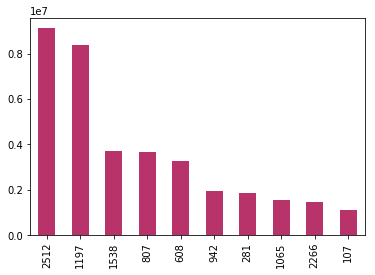

In [8]:
topten_byyear[0]['TOTAL_RELEASES'].plot.bar(label='total releases',color='#B8336A', legend=None)
topten_byyear[0]

### Total Toxic Releases 1998 - Top Ten

,YEAR,FACILITY_NAME,CHEMICAL,TOTAL_RELEASES
2930,1998,DUKE ENERGY CAROLINAS LLC - BELEWS CREEK STEAM...,HYDROCHLORIC ACID (1995 AND AFTER ACID AEROSOL...,14000005.0
2660,1998,DUKE ENERGY PROGRESS LLC - ROXBORO STEAM ELECT...,HYDROCHLORIC ACID (1995 AND AFTER ACID AEROSOL...,14000000.0
682,1998,DUKE ENERGY CAROLINAS LLC - MARSHALL STEAM STA...,HYDROCHLORIC ACID (1995 AND AFTER ACID AEROSOL...,12000005.0
2311,1998,ELEMENTIS CHROMIUM INC,CHROMIUM COMPOUNDS(EXCEPT CHROMITE ORE MINED I...,10019412.0
1610,1998,PCS PHOSPHATE CO INC,PHOSPHORIC ACID,7678354.0
2912,1998,DUKE ENERGY PROGRESS LLC-MAYO ELECTRIC GENERAT...,HYDROCHLORIC ACID (1995 AND AFTER ACID AEROSOL...,4400000.0
2664,1998,SMITHFIELD-TAR HEEL,NITRATE COMPOUNDS,4116033.0
1310,1998,DUKE ENERGY CAROLINAS LLC - ALLEN STEAM STATION,HYDROCHLORIC ACID (1995 AND AFTER ACID AEROSOL...,3800005.0
1702,1998,DUKE ENERGY CAROLINAS LLC - ROGERS ENERGY COMPLEX,HYDROCHLORIC ACID (1995 AND AFTER ACID AEROSOL...,3400005.0
1167,1998,DUKE ENERGY PROGRESS LLC - L V SUTTON ENERGY C...,HYDROCHLORIC ACID (1995 AND AFTER ACID AEROSOL...,2900000.0


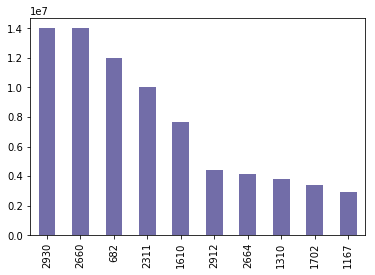

In [13]:
topten_byyear[1]['TOTAL_RELEASES'].plot.bar(label='total releases',color='#726DA8', legend=None)
topten_byyear[1]

### Total Toxic Releases 1999 - Top Ten

,YEAR,FACILITY_NAME,CHEMICAL,TOTAL_RELEASES
140,1999,DUKE ENERGY PROGRESS LLC - ROXBORO STEAM ELECT...,HYDROCHLORIC ACID (1995 AND AFTER ACID AEROSOL...,18000000.0
727,1999,DUKE ENERGY CAROLINAS LLC - BELEWS CREEK STEAM...,HYDROCHLORIC ACID (1995 AND AFTER ACID AEROSOL...,13000005.0
2494,1999,DUKE ENERGY CAROLINAS LLC - MARSHALL STEAM STA...,HYDROCHLORIC ACID (1995 AND AFTER ACID AEROSOL...,11000005.0
2080,1999,ELEMENTIS CHROMIUM INC,CHROMIUM COMPOUNDS(EXCEPT CHROMITE ORE MINED I...,8908356.0
1152,1999,DUKE ENERGY PROGRESS LLC-MAYO ELECTRIC GENERAT...,HYDROCHLORIC ACID (1995 AND AFTER ACID AEROSOL...,7400000.0
2111,1999,SMITHFIELD-TAR HEEL,NITRATE COMPOUNDS,5161604.0
644,1999,DUKE ENERGY CAROLINAS LLC - ALLEN STEAM STATION,HYDROCHLORIC ACID (1995 AND AFTER ACID AEROSOL...,4800005.0
187,1999,DUKE ENERGY PROGRESS LLC - L V SUTTON ENERGY C...,HYDROCHLORIC ACID (1995 AND AFTER ACID AEROSOL...,4200000.0
772,1999,DUKE ENERGY CAROLINAS LLC - ROGERS ENERGY COMPLEX,HYDROCHLORIC ACID (1995 AND AFTER ACID AEROSOL...,3400005.0
1364,1999,DUKE ENERGY PROGRESS INC - CAPE FEAR STEAM EL...,HYDROCHLORIC ACID (1995 AND AFTER ACID AEROSOL...,2500000.0


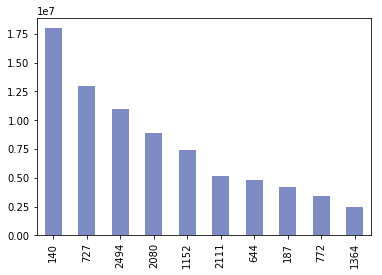

In [14]:
topten_byyear[2]['TOTAL_RELEASES'].plot.bar(label='total releases',color='#7D8CC4', legend=None)
topten_byyear[2]

### Total Toxic Releases 2000 - Top Ten

,YEAR,FACILITY_NAME,CHEMICAL,TOTAL_RELEASES
816,2000,DUKE ENERGY PROGRESS LLC - ROXBORO STEAM ELECT...,HYDROCHLORIC ACID (1995 AND AFTER ACID AEROSOL...,18000000.0
1609,2000,DUKE ENERGY CAROLINAS LLC - MARSHALL STEAM STA...,HYDROCHLORIC ACID (1995 AND AFTER ACID AEROSOL...,13000005.0
1687,2000,DUKE ENERGY CAROLINAS LLC - BELEWS CREEK STEAM...,HYDROCHLORIC ACID (1995 AND AFTER ACID AEROSOL...,10000005.0
358,2000,DUKE ENERGY PROGRESS LLC-MAYO ELECTRIC GENERAT...,HYDROCHLORIC ACID (1995 AND AFTER ACID AEROSOL...,9000000.0
1611,2000,DUKE ENERGY CAROLINAS LLC - ALLEN STEAM STATION,HYDROCHLORIC ACID (1995 AND AFTER ACID AEROSOL...,5300005.0
959,2000,SMITHFIELD-TAR HEEL,NITRATE COMPOUNDS,5129666.0
2651,2000,DUKE ENERGY PROGRESS LLC - L V SUTTON ENERGY C...,HYDROCHLORIC ACID (1995 AND AFTER ACID AEROSOL...,4200000.0
2424,2000,DUKE ENERGY CAROLINAS LLC - ROGERS ENERGY COMPLEX,HYDROCHLORIC ACID (1995 AND AFTER ACID AEROSOL...,3800005.0
419,2000,DUKE ENERGY PROGRESS INC - CAPE FEAR STEAM EL...,HYDROCHLORIC ACID (1995 AND AFTER ACID AEROSOL...,2700000.0
78,2000,DUKE ENERGY PROGRESS LLC - H F LEE ENERGY COMPLEX,HYDROCHLORIC ACID (1995 AND AFTER ACID AEROSOL...,2400000.0


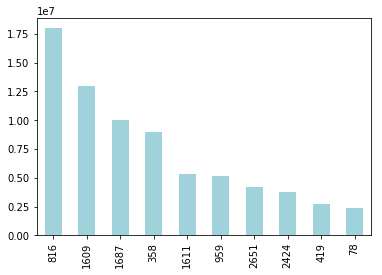

In [15]:
topten_byyear[3]['TOTAL_RELEASES'].plot.bar(label='total releases',color='#A0D2DB', legend=None)
topten_byyear[3]

### Total Toxic Releases 2001 - Top Ten

,YEAR,FACILITY_NAME,CHEMICAL,TOTAL_RELEASES
728,2001,DUKE ENERGY PROGRESS LLC - ROXBORO STEAM ELECT...,HYDROCHLORIC ACID (1995 AND AFTER ACID AEROSOL...,18000000.0
1463,2001,DUKE ENERGY CAROLINAS LLC - BELEWS CREEK STEAM...,HYDROCHLORIC ACID (1995 AND AFTER ACID AEROSOL...,11000000.0
1004,2001,DUKE ENERGY CAROLINAS LLC - MARSHALL STEAM STA...,HYDROCHLORIC ACID (1995 AND AFTER ACID AEROSOL...,10000000.0
253,2001,DUKE ENERGY PROGRESS LLC-MAYO ELECTRIC GENERAT...,HYDROCHLORIC ACID (1995 AND AFTER ACID AEROSOL...,8300000.0
2661,2001,SMITHFIELD-TAR HEEL,NITRATE COMPOUNDS,6288692.0
1393,2001,DUKE ENERGY CAROLINAS LLC - ALLEN STEAM STATION,HYDROCHLORIC ACID (1995 AND AFTER ACID AEROSOL...,4600000.0
370,2001,DUKE ENERGY PROGRESS LLC - L V SUTTON ENERGY C...,HYDROCHLORIC ACID (1995 AND AFTER ACID AEROSOL...,4000000.0
2689,2001,DUKE ENERGY CAROLINAS LLC - ROGERS ENERGY COMPLEX,HYDROCHLORIC ACID (1995 AND AFTER ACID AEROSOL...,3200000.0
151,2001,DUKE ENERGY PROGRESS INC - CAPE FEAR STEAM EL...,HYDROCHLORIC ACID (1995 AND AFTER ACID AEROSOL...,2400000.0
2280,2001,DUKE ENERGY PROGRESS LLC - H F LEE ENERGY COMPLEX,HYDROCHLORIC ACID (1995 AND AFTER ACID AEROSOL...,2400000.0


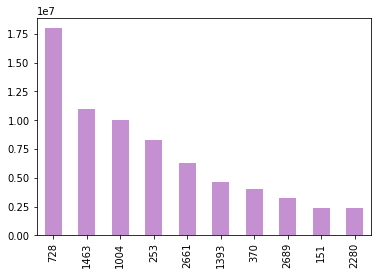

In [16]:
topten_byyear[4]['TOTAL_RELEASES'].plot.bar(label='total releases',color='#C490D1', legend=None)
topten_byyear[4]

### Observations - Top Releasing Facilities - Total

Clearly, something happened between 1997-98, where Duke Energy began to dominate the top emissions. It would be interesting to dig more into why this is. Perhaps Duke didn't report until 1998, those facilities didn't operate before that, or something about their processes changed? It also appears that the total output among the highest releasing facilities skyrocketed around that time.

## Top Releasing Facilities - Carcinogens

In [21]:
carcReleases = [yr[['YEAR','FACILITY_NAME','CHEMICAL','CARCINOGEN','TOTAL_RELEASES']] for yr in nc_data]
topTenCarcinogens = [carcReleases[i][carcReleases[i].CARCINOGEN =='YES'].sort_values('TOTAL_RELEASES',ascending=False)[0:10] for i in range(len(carcReleases))]

### Carcinogenic Toxic Releases 1997 - Top Ten

,YEAR,FACILITY_NAME,CHEMICAL,CARCINOGEN,TOTAL_RELEASES
835,1997,BARNHARDT MANUFACTURING CO NCFI POLYURETHANES DIV,DICHLOROMETHANE,YES,541149.0
913,1997,INTERNATIONAL PAPER RIEGELWOOD MILL,CHLOROFORM,YES,475000.0
742,1997,FXI INC,DICHLOROMETHANE,YES,433130.0
908,1997,INNOCOR FOAM TECHNOLOGIES-ACP INC,DICHLOROMETHANE,YES,385008.0
1079,1997,AMERICAN & EFIRD LLC PLANT 05 & 15,DICHLOROMETHANE,YES,353029.0
1995,1997,OLYMPIC PRODUCTS LLC,DICHLOROMETHANE,YES,340168.0
1208,1997,ARAUCO PANELS USA LLC,FORMALDEHYDE,YES,319102.0
644,1997,GRADY WHITE BOATS INC,STYRENE,YES,278585.0
1561,1997,DAK AMERICAS LLC CAPE FEAR SITE,ACETALDEHYDE,YES,232876.0
534,1997,FOAMEX LP,DICHLOROMETHANE,YES,201213.0


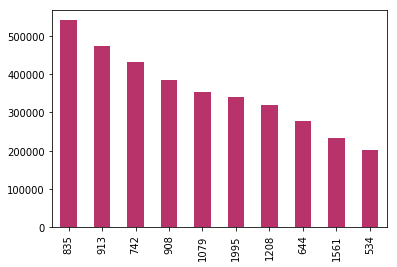

In [22]:
topTenCarcinogens[0]['TOTAL_RELEASES'].plot.bar(label='total releases',color='#B8336A', legend=None)
topTenCarcinogens[0]

### Carcinogenic Toxic Releases 1998 - Top Ten

,YEAR,FACILITY_NAME,CHEMICAL,CARCINOGEN,TOTAL_RELEASES
2644,1998,BARNHARDT MANUFACTURING CO NCFI POLYURETHANES DIV,DICHLOROMETHANE,YES,507211.0
2152,1998,FOAMEX LP,DICHLOROMETHANE,YES,376083.0
1297,1998,OLYMPIC PRODUCTS LLC,DICHLOROMETHANE,YES,351634.0
2555,1998,ARAUCO PANELS USA LLC,FORMALDEHYDE,YES,335184.0
182,1998,AMERICAN & EFIRD LLC PLANT 05 & 15,DICHLOROMETHANE,YES,322104.0
1409,1998,INNOCOR FOAM TECHNOLOGIES-ACP INC,DICHLOROMETHANE,YES,314890.0
1255,1998,"BATHCRAFT, LLC..",STYRENE,YES,304000.0
2415,1998,GRADY WHITE BOATS INC,STYRENE,YES,294199.0
1222,1998,INTERNATIONAL PAPER RIEGELWOOD MILL,CHLOROFORM,YES,273303.0
813,1998,HERITAGE ENVIRONMENTAL SERVICES LLC,NICKEL,YES,258390.0


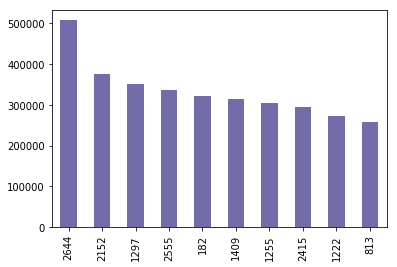

In [23]:
topTenCarcinogens[1]['TOTAL_RELEASES'].plot.bar(label='total releases',color='#726DA8', legend=None)
topTenCarcinogens[1]

### Carcinogenic Toxic Releases 1999 - Top Ten

,YEAR,FACILITY_NAME,CHEMICAL,CARCINOGEN,TOTAL_RELEASES
791,1999,OLYMPIC PRODUCTS LLC,DICHLOROMETHANE,YES,366920.0
1763,1999,ARAUCO PANELS USA LLC,FORMALDEHYDE,YES,356307.0
1951,1999,AMERICAN & EFIRD LLC PLANT 05 & 15,DICHLOROMETHANE,YES,351780.0
1071,1999,INNOCOR FOAM TECHNOLOGIES-ACP INC,DICHLOROMETHANE,YES,333540.0
351,1999,BARNHARDT MANUFACTURING CO NCFI POLYURETHANES DIV,DICHLOROMETHANE,YES,332016.0
2292,1999,"BATHCRAFT, LLC..",STYRENE,YES,325157.0
2450,1999,GRADY WHITE BOATS INC,STYRENE,YES,275359.0
2161,1999,FXI INC,DICHLOROMETHANE,YES,239763.0
1435,1999,HERITAGE ENVIRONMENTAL SERVICES LLC,NICKEL,YES,189595.0
2220,1999,BLUE RIDGE PAPER PRODUCTS INC (DBA EVERGREEN P...,ACETALDEHYDE,YES,158900.0


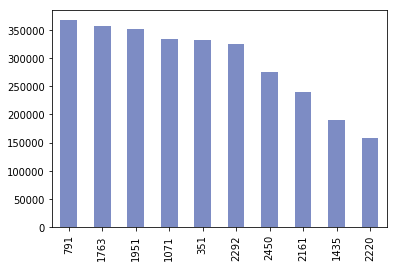

In [24]:
topTenCarcinogens[2]['TOTAL_RELEASES'].plot.bar(label='total releases',color='#7D8CC4', legend=None)
topTenCarcinogens[2]

### Carcinogenic Toxic Releases 2000 - Top Ten

,YEAR,FACILITY_NAME,CHEMICAL,CARCINOGEN,TOTAL_RELEASES
1572,2000,FXI INC,DICHLOROMETHANE,YES,374745.0
1045,2000,OLYMPIC PRODUCTS LLC,DICHLOROMETHANE,YES,349780.0
1409,2000,"BATHCRAFT, LLC..",STYRENE,YES,340500.0
417,2000,AMERICAN & EFIRD LLC PLANT 05 & 15,DICHLOROMETHANE,YES,328228.0
1349,2000,INNOCOR FOAM TECHNOLOGIES-ACP INC,DICHLOROMETHANE,YES,314824.0
2587,2000,ARAUCO PANELS USA LLC,FORMALDEHYDE,YES,309319.0
66,2000,HERITAGE ENVIRONMENTAL SERVICES LLC,NICKEL,YES,220635.0
2123,2000,GRADY WHITE BOATS INC,STYRENE,YES,211618.0
1099,2000,DSM PHARMACEUTICALS INC,DICHLOROMETHANE,YES,207997.0
355,2000,RSI HOME PRODUCTS,STYRENE,YES,176539.0


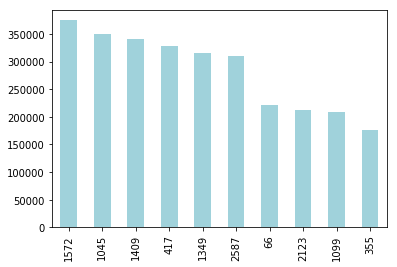

In [25]:
topTenCarcinogens[3]['TOTAL_RELEASES'].plot.bar(label='total releases',color='#A0D2DB', legend=None)
topTenCarcinogens[3]

### Carcinogenic Toxic Releases 2001 - Top Ten

,YEAR,FACILITY_NAME,CHEMICAL,CARCINOGEN,TOTAL_RELEASES
1796,2001,"BATHCRAFT, LLC..",STYRENE,YES,372700.0
1956,2001,AMERICAN & EFIRD LLC PLANT 05 & 15,DICHLOROMETHANE,YES,324248.0
2017,2001,ARAUCO PANELS USA LLC,FORMALDEHYDE,YES,266153.0
2259,2001,DAK AMERICAS LLC CAPE FEAR SITE,COBALT COMPOUNDS,YES,211296.0
62,2001,GRADY WHITE BOATS INC,STYRENE,YES,191158.0
2717,2001,WIX FILTRATION CORP - ALLEN PLANT,DI(2-ETHYLHEXYL) PHTHALATE,YES,172650.0
450,2001,HERITAGE ENVIRONMENTAL SERVICES LLC,NICKEL,YES,162830.0
243,2001,BLUE RIDGE PAPER PRODUCTS INC (DBA EVERGREEN P...,ACETALDEHYDE,YES,158560.0
2237,2001,FXI INC,DICHLOROMETHANE,YES,154435.0
428,2001,RSI HOME PRODUCTS,STYRENE,YES,148079.0


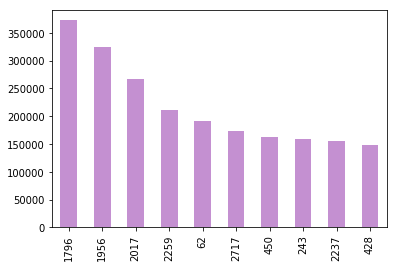

In [26]:
topTenCarcinogens[4]['TOTAL_RELEASES'].plot.bar(label='total releases',color='#C490D1', legend=None)
topTenCarcinogens[4]

### Observations - Top Releasing Facilities - Carcinogens

One clear difference in the top carcinogen-releasing facilities as compared to the overall top-releasing facilities is the spead of releases within that group. In the top ten, the release numbers are very close, and generally are large amounts of Dichloromethane.

# Top Releasing Industry Sectors

In [48]:
#code, charts and graphs related to top releasing facilities
sectors = [yr[['INDUSTRY_SECTOR', 'CHEMICAL','TOTAL_RELEASES']] for yr in nc_data]
sectors[0].groupby(['INDUSTRY_SECTOR','CHEMICAL']).sum()#.sort_values('TOTAL_RELEASES', ascending=False)

TOTAL_RELEASES
INDUSTRY_SECTOR          CHEMICAL                                                          
Apparel                  AMMONIA                                                     1065.0
                         CHLORINE                                                       0.0
                         DIMETHYL PHTHALATE                                           976.0
                         NAPHTHALENE                                                  157.0
                         SULFURIC ACID (1994 AND AFTER ACID AEROSOLS" ON...             0.0
Beverages                AMMONIA                                                   101600.0
                         CHLORINE                                                       0.0
                         HYDROCHLORIC ACID (1995 AND AFTER ACID AEROSOLS...         82000.0
                         NITRATE COMPOUNDS                                          21300.0
                         PHOSPHORIC ACID                                                0.0
Chemical Wholesalers     CERTAIN GLYCOL ETHERS                                          0.0
                         CHLORINE                                                     161.0
Chemicals                1,1-DICHLORO-1-FLUOROETHANE                                29326.0
                         1,2,4-TRICHLOROBENZENE                                         0.0
                         1,2,4-TRIMETHYLBENZENE                                     20845.0
                         1,2-DICHLOROETHANE                                          5102.0
                         1,3-BUTADIENE                                               5080.0
                         1,3-PHENYLENEDIAMINE                                           0.0
                         1,4-DICHLOROBENZENE                                         7893.0
                         1,4-DIOXANE                                                54406.0
                         2,4-DIAMINOTOLUENE                                             0.0
                         2-METHOXYETHANOL                                             102.0
                         2-PHENYLPHENOL                                                 0.0
                         3,3'-DIMETHOXYBENZIDINE DIHYDROCHLORIDE                        0.0
                         4,4'-ISOPROPYLIDENEDIPHENOL                                  318.0
                         4,4'-METHYLENEDIANILINE                                        0.0
                         4-AMINOAZOBENZENE                                              0.0
                         ACETALDEHYDE                                              881913.0
                         ACETONITRILE                                                4356.0
                         ACETOPHENONE                                                   0.0
...                                                                                     ...
Transportation Equipment TOLUENE-2,4-DIISOCYANATE                                       0.0
                         XYLENE (MIXED ISOMERS)                                     56546.0
                         ZINC (FUME OR DUST)                                        27615.0
                         ZINC COMPOUNDS                                             20878.0
Wood Products            ACETALDEHYDE                                              152459.0
                         ACROLEIN                                                   36000.0
                         AMMONIA                                                    10910.0
                         ANTHRACENE                                                     5.0
                         ARSENIC                                                        0.0
                         ARSENIC COMPOUNDS                                           3299.0
                         BARIUM COMPOUNDS                                            6111.0
                         CERT

## Basemap Visualization

In [5]:
#code and Basemap visualizations